# Projet 9: Produisez une étude de marché (partie1) 

## 1. Importation des packages 

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

## 2. Imporation des fichiers csv 

In [2]:
dispo = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
popu = pd.read_csv('Population_2000_2018.csv')

## 3. Exploration et nettoyage des DataFrames
### 3.1 Exploration et nettoyage du DataFrame Dispo 

In [3]:
dispo.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [5]:
# je renomme la variable
dispo = dispo.rename(columns={'Zone':'Pays'})                               

In [6]:
dispo['Produit'].nunique()

98

In [7]:
dispo['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [8]:
# Je filtre les données sur Viande de volaille 
dispo_volaille = dispo.loc[dispo['Produit'] == 'Viande de Volailles']
dispo_volaille.head()

,Code Domaine,Domaine,Code zone,Pays,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [9]:
# Je supprime les varibales inutiles à l'analyse 
variables_a_supprimer = ['Code Domaine', 'Domaine', 'Code zone', 'Code Élément', 'Code Produit','Code année','Symbole','Description du Symbole', 'Produit', 'Unité', 'Année']
dispo_volaille = dispo_volaille.drop(variables_a_supprimer, axis=1)

In [10]:
dispo_volaille.head()

,Pays,Élément,Valeur
651,Afghanistan,Production,28.0
652,Afghanistan,Importations - Quantité,29.0
653,Afghanistan,Variation de stock,0.0
654,Afghanistan,Disponibilité intérieure,57.0
655,Afghanistan,Pertes,2.0


In [11]:
dispo_volaille['Élément'].nunique()

17

In [12]:
dispo_volaille['Pays'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Cabo Verde',
       'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chine, Taiwan Province de', 'Chypre',
       'Colombie', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie',
       'Cuba', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équateur', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande', 'France', 'Gabon',
       'Gambie', 'Géorgie', 'Ghana', 'Grèce', 'Grenade', 'Gu

In [13]:
dispo_volaille['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Alimentation pour touristes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Aliments pour animaux', 'Semences'], dtype=object)

In [14]:
# Je renomme la modalité 'Autres utilisations (non alimentaire)' pour ne pas quelle me pose problème lors de la suppression
ancienne_modalite = 'Autres utilisations (non alimentaire)'
nouvelle_modalite = 'Autres utilisations - non alimentaire'
dispo_volaille['Élément'] = dispo_volaille['Élément'].replace(ancienne_modalite, nouvelle_modalite)

In [15]:
# Je crée la liste des Éléments inutils à supprimer
element_a_sup = ['Variation de stock', 'Pertes', 'Résidus', 'Alimentation pour touristes', 'Traitement', 'Autres utilisations - non alimentaire','Aliments pour animaux', 'Semences'] 

In [16]:
# Je filtre pour exclure les lignes avec les éléments à supprimer
dispo_volaille = dispo_volaille[~dispo_volaille['Élément'].isin(element_a_sup)]

In [17]:
dispo_volaille['Élément'].unique()

array(['Production', 'Importations - Quantité',
       'Disponibilité intérieure', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité'], dtype=object)

In [18]:
# J'utilise pivot() pour créer les colonnes avec les valeurs de la liste Élément
dispo_volaille = dispo_volaille.pivot(index=['Pays'],
                                     columns='Élément',
                                     values='Valeur')

In [19]:
# Je réinitialise l'index pour obtenir la colonne 'Pays'
dispo_volaille.reset_index(inplace=True)

In [20]:
dispo_volaille.head()

Élément,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
0,Afghanistan,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0
1,Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0
2,Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0
3,Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0
4,Allemagne,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0


In [21]:
dispo_volaille.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Pays                                                           172 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 3   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 4   Disponibilité de protéines en quantité (g/personne/jour)       172 non-null    float64
 5   Disponibilité intérieure                                       170 non-null    float64
 6   Exportations - Quantité                                        135 non-null    float64
 7   Importations - Quantité                                       

In [22]:
# J'affiche le nombre de valeurs manquantes par serie
dispo_volaille.isnull().sum()

Élément
Pays                                                              0
Disponibilité alimentaire (Kcal/personne/jour)                    0
Disponibilité alimentaire en quantité (kg/personne/an)            0
Disponibilité de matière grasse en quantité (g/personne/jour)     0
Disponibilité de protéines en quantité (g/personne/jour)          0
Disponibilité intérieure                                          2
Exportations - Quantité                                          37
Importations - Quantité                                           2
Nourriture                                                        2
Production                                                        4
dtype: int64

In [23]:
# J'affiche les NAN de la variable 'Exportations - Quantité'
dispo_volaille[dispo_volaille['Exportations - Quantité'].isnull()]

Élément,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
0,Afghanistan,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0
13,Bahamas,182.0,43.17,13.33,14.61,26.0,NaN,24.0,16.0,6.0
14,Bangladesh,7.0,1.50,0.51,0.47,250.0,NaN,0.0,240.0,249.0
23,Burkina Faso,8.0,2.27,0.48,0.77,46.0,NaN,0.0,44.0,46.0
26,Cabo Verde,62.0,17.62,3.75,6.52,10.0,NaN,12.0,9.0,1.0
27,Cambodge,11.0,2.34,0.85,0.74,38.0,NaN,10.0,37.0,28.0
40,Cuba,82.0,23.72,5.70,7.12,342.0,NaN,312.0,269.0,29.0
43,Djibouti,9.0,2.68,0.59,0.92,3.0,NaN,3.0,3.0,NaN
54,Gambie,12.0,3.53,0.75,1.24,8.0,NaN,16.0,8.0,2.0
56,Grenade,192.0,45.70,13.99,15.50,8.0,NaN,7.0,5.0,1.0


#### Les pays dont seules les valeurs de l'exporation ne sont pas communiquées, je les concerverai et remplacerai les NAN par 0. En effet, au vu des pays concernés et au vu de leur production, il est fort possible que ces derniers n'exportent pas de viande de volaille. 

In [24]:
# Je remplace les NAN de la variable exportation par 0 
dispo_volaille['Exportations - Quantité'] = dispo_volaille['Exportations - Quantité'].fillna(0)

In [25]:
# J'affiche les autres NAN de la variable 'Production'
dispo_volaille[dispo_volaille['Production'].isnull()]

Élément,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
43,Djibouti,9.0,2.68,0.59,0.92,3.0,0.0,3.0,3.0,NaN
92,Maldives,47.0,13.50,2.94,4.70,12.0,0.0,12.0,7.0,NaN
113,Ouzbékistan,6.0,1.96,0.40,0.63,NaN,0.0,NaN,NaN,NaN
130,République démocratique populaire lao,41.0,10.91,2.81,3.59,NaN,0.0,NaN,NaN,NaN


In [26]:
# Les 4 pays comportent plusieurs NAN donc pour ne pas fausser mon analyse, je décide de les supprimer. 
pays_a_supprimer = ['Djibouti', 'Maldives', 'Ouzbékistan', 'République démocratique populaire lao']
dispo_volaille = dispo_volaille[~dispo_volaille['Pays'].isin(pays_a_supprimer)]

In [27]:
dispo_volaille.shape

(168, 10)

In [28]:
dispo_volaille.isnull().sum()

Élément
Pays                                                             0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                       0
Production                                                       0
dtype: int64

#### Le DF dispo_volaille comporte aprés nettoyage, 168 individus et 10 variables. Il comporte des valeurs maquantes dont j'ai fait le choix de ne pas faire d'imputation pour ne pas fausser mon analyse. Il n'y a pas de doublons. La série  'Pays' sera  utilisée comme clé de jointure. 

### 3.2 Exploration et nettoyage du DataFrame popu

In [29]:
popu.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [30]:
popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [31]:
# je renomme la variable Zone
popu = popu.rename(columns={'Zone': 'Pays',
                           'Valeur': 'Nombre Habitant'})     

In [32]:
# Exprimer la valeur en 1000 d'habitant
popu['Nombre Habitant'] = popu['Nombre Habitant'] *1000
popu.head()

,Code Domaine,Domaine,Code zone,Pays,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Nombre Habitant,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779953.0,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606988.0,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600770.0,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680871.0,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726684.0,X,Sources internationales sûres,NaN


In [33]:
# Je supprime les series qui ne seront pas utiles à l'analyse
popu = popu.drop(['Code Domaine', 'Domaine', 'Code zone', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Unité', 'Symbole', 'Description du Symbole', 'Note'], axis=1)

In [34]:
popu.shape

(4411, 3)

In [35]:
popu.isnull().sum()

Pays               0
Année              0
Nombre Habitant    0
dtype: int64

In [36]:
popu.duplicated().sum()

0

In [37]:
popu['Pays'].nunique()

238

In [38]:
popu.head()

,Pays,Année,Nombre Habitant
0,Afghanistan,2000,20779953.0
1,Afghanistan,2001,21606988.0
2,Afghanistan,2002,22600770.0
3,Afghanistan,2003,23680871.0
4,Afghanistan,2004,24726684.0


In [39]:
# Je mets les années en colonne pour pouvoir calculer l'évolution de la population entre 2012 et 2017
popu =popu.pivot_table(index = 'Pays', columns = 'Année', values = 'Nombre Habitant')
popu

Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Pays,,,,,,,,,,,,,,,,,,,
Afghanistan,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383032.0,36296113.0,37171921.0
Afrique du Sud,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52003755.0,52832658.0,53687121.0,54544186.0,55386367.0,56207646.0,57009756.0,57792518.0
Albanie,3129243.0,3129704.0,3126187.0,3118023.0,3104892.0,3086810.0,3063021.0,3033998.0,3002678.0,2973048.0,2948023.0,2928592.0,2914096.0,2903790.0,2896305.0,2890513.0,2886438.0,2884169.0,2882740.0
Algérie,31042235.0,31451514.0,31855109.0,32264157.0,32692163.0,33149724.0,33641002.0,34166972.0,34730608.0,35333881.0,35977455.0,36661445.0,37383895.0,38140133.0,38923692.0,39728025.0,40551392.0,41389189.0,42228408.0
Allemagne,81400882.0,81453885.0,81535122.0,81614380.0,81646474.0,81602741.0,81472226.0,81277830.0,81065752.0,80899961.0,80827002.0,80855632.0,80972628.0,81174367.0,81450378.0,81787411.0,82193768.0,82658409.0,83124418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Îles Salomon,412660.0,423944.0,435432.0,447017.0,458539.0,469918.0,481078.0,492132.0,503360.0,515181.0,527861.0,541521.0,556063.0,571336.0,587079.0,603118.0,619438.0,636039.0,652857.0
Îles Turques-et-Caïques,20164.0,21573.0,23232.0,25011.0,26700.0,28180.0,29391.0,30385.0,31202.0,31934.0,32660.0,33377.0,34066.0,34731.0,35369.0,35981.0,36559.0,37115.0,37665.0
Îles Vierges américaines,108722.0,108691.0,108561.0,108360.0,108092.0,107794.0,107462.0,107115.0,106756.0,106412.0,106087.0,105793.0,105534.0,105303.0,105114.0,104958.0,104835.0,104751.0,104680.0


In [40]:
# Je calcule dans une variable l'évolution de la population entre 2015 et 2017 (sur 2 ans)
popu['Evolution_pop %'] = round((popu[2017] - popu[2015]) / popu[2015] * 100, 2)
popu.head()

Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Evolution_pop %
Pays,,,,,,,,,,,,,,,,,,,,
Afghanistan,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383032.0,36296113.0,37171921.0,5.47
Afrique du Sud,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52003755.0,52832658.0,53687121.0,54544186.0,55386367.0,56207646.0,57009756.0,57792518.0,2.93
Albanie,3129243.0,3129704.0,3126187.0,3118023.0,3104892.0,3086810.0,3063021.0,3033998.0,3002678.0,2973048.0,2948023.0,2928592.0,2914096.0,2903790.0,2896305.0,2890513.0,2886438.0,2884169.0,2882740.0,-0.22
Algérie,31042235.0,31451514.0,31855109.0,32264157.0,32692163.0,33149724.0,33641002.0,34166972.0,34730608.0,35333881.0,35977455.0,36661445.0,37383895.0,38140133.0,38923692.0,39728025.0,40551392.0,41389189.0,42228408.0,4.18
Allemagne,81400882.0,81453885.0,81535122.0,81614380.0,81646474.0,81602741.0,81472226.0,81277830.0,81065752.0,80899961.0,80827002.0,80855632.0,80972628.0,81174367.0,81450378.0,81787411.0,82193768.0,82658409.0,83124418.0,1.06


In [41]:
# Je réinitialise l'index pour obtenir la colonne 'Pays'
popu.reset_index(inplace=True)
popu.head()

Année,Pays,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Evolution_pop %
0,Afghanistan,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383032.0,36296113.0,37171921.0,5.47
1,Afrique du Sud,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,...,51216964.0,52003755.0,52832658.0,53687121.0,54544186.0,55386367.0,56207646.0,57009756.0,57792518.0,2.93
2,Albanie,3129243.0,3129704.0,3126187.0,3118023.0,3104892.0,3086810.0,3063021.0,3033998.0,3002678.0,...,2948023.0,2928592.0,2914096.0,2903790.0,2896305.0,2890513.0,2886438.0,2884169.0,2882740.0,-0.22
3,Algérie,31042235.0,31451514.0,31855109.0,32264157.0,32692163.0,33149724.0,33641002.0,34166972.0,34730608.0,...,35977455.0,36661445.0,37383895.0,38140133.0,38923692.0,39728025.0,40551392.0,41389189.0,42228408.0,4.18
4,Allemagne,81400882.0,81453885.0,81535122.0,81614380.0,81646474.0,81602741.0,81472226.0,81277830.0,81065752.0,...,80827002.0,80855632.0,80972628.0,81174367.0,81450378.0,81787411.0,82193768.0,82658409.0,83124418.0,1.06


In [42]:
popu = popu.rename(columns= {2017 :'Nombre Habitant'})

In [43]:
# Je garde que 3 variables dans df final popu (pays, évolution population et Nombre d'habitant en 2017) 
popu = popu[['Pays', 'Nombre Habitant', 'Evolution_pop %']]
popu

Année,Pays,Nombre Habitant,Evolution_pop %
0,Afghanistan,36296113.0,5.47
1,Afrique du Sud,57009756.0,2.93
2,Albanie,2884169.0,-0.22
3,Algérie,41389189.0,4.18
4,Allemagne,82658409.0,1.06
...,...,...,...
233,Îles Salomon,636039.0,5.46
234,Îles Turques-et-Caïques,37115.0,3.15
235,Îles Vierges américaines,104751.0,-0.20
236,Îles Vierges britanniques,29577.0,1.46


In [44]:
popu.isnull().sum()

Année
Pays               0
Nombre Habitant    2
Evolution_pop %    2
dtype: int64

In [45]:
# Sélectionnez les lignes avec des NaN dans la colonne "Stabilité_politique"
pays_nan_Nombre_Habitant_evolution = popu[popu['Nombre Habitant'].isna()]
print(pays_nan_Nombre_Habitant_evolution)

Année                  Pays  Nombre Habitant  Evolution_pop %
182    Serbie-et-Monténégro              NaN              NaN
191             Soudan (ex)              NaN              NaN


In [46]:
# Je supprime les pays avec les données manquantes 
pays_a_supprimer = ['Serbie-et-Monténégro', 'Soudan (ex)']
popu = popu[~popu['Pays'].isin(pays_a_supprimer)]
popu

Année,Pays,Nombre Habitant,Evolution_pop %
0,Afghanistan,36296113.0,5.47
1,Afrique du Sud,57009756.0,2.93
2,Albanie,2884169.0,-0.22
3,Algérie,41389189.0,4.18
4,Allemagne,82658409.0,1.06
...,...,...,...
233,Îles Salomon,636039.0,5.46
234,Îles Turques-et-Caïques,37115.0,3.15
235,Îles Vierges américaines,104751.0,-0.20
236,Îles Vierges britanniques,29577.0,1.46


In [47]:
popu.isnull().sum()

Année
Pays               0
Nombre Habitant    0
Evolution_pop %    0
dtype: int64

#### Le DF popu comporte aprés nettoyage, comporte 236 individus et 3 variables. Il ne comporte pas de valeurs maquantes, ni de doublons. La série  'Pays' sera utilisé comme clé de jointure. 

## 4. Jointure des DataFrames


In [48]:
# Jointure du df dispo_volaille au df popu
df = dispo_volaille.merge(popu, on='Pays',how='inner', indicator= True)
df

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Nombre Habitant,Evolution_pop %,_merge
0,Afghanistan,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,28.0,36296113.0,5.47,both
1,Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,57009756.0,2.93,both
2,Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,2884169.0,-0.22,both
3,Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,41389189.0,4.18,both
4,Allemagne,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0,82658409.0,1.06,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Émirats arabes unis,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,48.0,9487203.0,2.42,both
164,Équateur,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,340.0,16785361.0,3.54,both
165,États-Unis d'Amérique,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,21914.0,325084756.0,1.31,both
166,Éthiopie,0.0,0.13,0.03,0.04,14.0,0.0,1.0,14.0,14.0,106399924.0,5.52,both


In [49]:
# Je supprime la variable '_merge'
df.drop(columns=['_merge'], inplace=True)

In [50]:
df.shape

(168, 12)

In [51]:
df.duplicated().sum()

0

## 5. Analyse exploratoire univariée

### 5.1 Evolution de la population 

In [52]:
df['Nombre Habitant'] = df['Nombre Habitant'].astype(int)

In [53]:
# J'affiche les 10 pays qui comptent la plus grande évolution 
top_10_pays_evolution = df.sort_values(by='Evolution_pop %', ascending=False)[['Pays', 'Evolution_pop %']]
top_10_pays_evolution.head(10)

,Pays,Evolution_pop %
109,Oman,9.34
103,Niger,8.00
110,Ouganda,7.69
5,Angola,6.93
145,Tchad,6.42
128,République-Unie de Tanzanie,6.17
91,Mali,6.16
160,Zambie,6.14
53,Gambie,6.14
52,Gabon,6.01


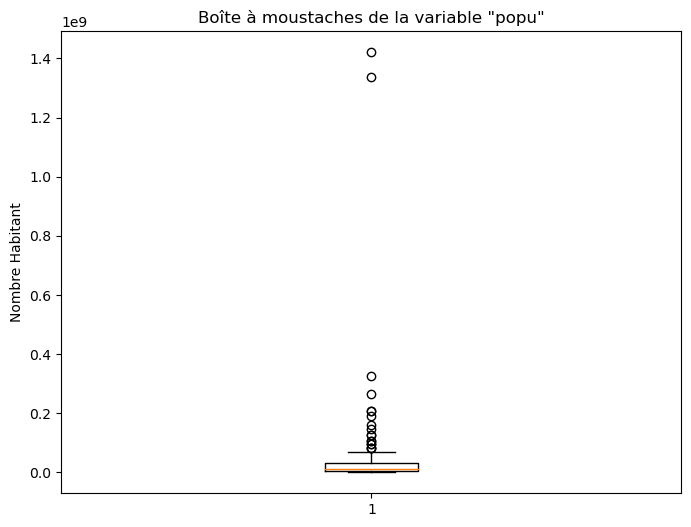

In [54]:
# J'affiche dans une boîte à moustaches la distribution des valeurs de la variable "Nombre Habitant" 
plt.figure(figsize=(8, 6))  
plt.boxplot(df['Nombre Habitant'])
plt.title('Boîte à moustaches de la variable "popu"')
plt.ylabel('Nombre Habitant')
plt.show()

#### Les deux grands outliers correspondent à la population de la chine et de l'inde, à voir si nous conservons ses pays ou pas pour la suite de l'analyse.

### 5.2 Production 

In [55]:
# Les 10 pays qui produisent le plus de viande de volaille 
pays_prod_min = df.sort_values(by='Production', ascending=False)[['Pays', 'Production']]
pays_prod_min.head(10)

,Pays,Production
165,États-Unis d'Amérique,21914.0
34,"Chine, continentale",18236.0
21,Brésil,14201.0
51,Fédération de Russie,4444.0
65,Inde,3545.0
96,Mexique,3249.0
116,Pologne,2351.0
66,Indonésie,2301.0
74,Japon,2215.0
153,Turquie,2192.0


### 5.3 Balance commerciale : 
Il s'agit de savoir si un pays exporte plus de viande de volaille  qu'il n'en importe.

Si un pays exporte plus de viande de volaille  qu'il n'en importe, sa balance commerciale relative à la viande de volaille est +  
Inversement, si un pays importe plus de viande de volaille  qu'il n'en exporte, sa balance commerciale relative à la viande de volaille est -

In [56]:
# Je calcule la balance commerciale de chaque pays relative à la viande de volaille 
df['Balance commerciale'] = df['Exportations - Quantité'] - df['Importations - Quantité']
df.head()


,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Nombre Habitant,Evolution_pop %,Balance commerciale
0,Afghanistan,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,28.0,36296113,5.47,-29.0
1,Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,57009756,2.93,-451.0
2,Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,2884169,-0.22,-38.0
3,Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,41389189,4.18,-2.0
4,Allemagne,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0,82658409,1.06,-196.0


In [57]:
# J'affiche les pays qui ont une balance commerciale + 
pays_balance_posi = df[df['Balance commerciale'] >= 1]
pays_balance_posi.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Nombre Habitant,Evolution_pop %,Balance commerciale
8,Argentine,182.0,42.24,13.84,13.53,1962.0,207.0,8.0,1856.0,2161.0,43937140,2.00,199.0
10,Australie,192.0,47.65,13.45,16.60,1171.0,42.0,16.0,1171.0,1269.0,24584620,2.72,26.0
16,Belgique,44.0,12.65,2.71,4.57,152.0,656.0,338.0,144.0,463.0,11419748,1.17,318.0
21,Brésil,204.0,48.03,15.34,15.68,9982.0,4223.0,3.0,9982.0,14201.0,207833823,1.64,4220.0
24,Bélarus,95.0,27.98,6.06,9.41,265.0,152.0,21.0,264.0,463.0,9450231,0.11,131.0


#### Une balance commerciale positive, indique un excédent commerciale. Le pays exporte plus qu'il n'en importe.

In [58]:
# J'affiche les pays qui ont une balance commerciale -
pays_balance_nega = df[df['Balance commerciale'] < 1]
pays_balance_nega.head(10)

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Nombre Habitant,Evolution_pop %,Balance commerciale
0,Afghanistan,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,28.0,36296113,5.47,-29.0
1,Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,57009756,2.93,-451.0
2,Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,2884169,-0.22,-38.0
3,Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,41389189,4.18,-2.0
4,Allemagne,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0,82658409,1.06,-196.0
5,Angola,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,42.0,29816766,6.93,-277.0
6,Antigua-et-Barbuda,233.0,54.10,17.55,17.77,7.0,0.0,7.0,5.0,0.0,95426,1.99,-7.0
7,Arabie saoudite,151.0,43.36,9.38,15.57,1435.0,10.0,722.0,1435.0,616.0,33101178,4.36,-712.0
9,Arménie,54.0,16.06,3.39,5.44,47.0,0.0,35.0,47.0,11.0,2944791,0.66,-35.0
11,Autriche,65.0,18.20,3.66,7.49,173.0,78.0,110.0,160.0,148.0,8819901,1.63,-32.0


#### Une balance commerciale négative, indique un déficite commerciale. Le pays importe plus qu'il n'en exporte.

In [59]:
# Je sauvgarde mon df en tant que fichies csv 
df.to_csv('C:\\Users\\halim\\OneDrive\\Bureau\\Projet_9\\csv.dff_17.csv', index=False)